Initial data head:
      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1  

Data shape:
(1215745, 14)

Missing values per column:
alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz

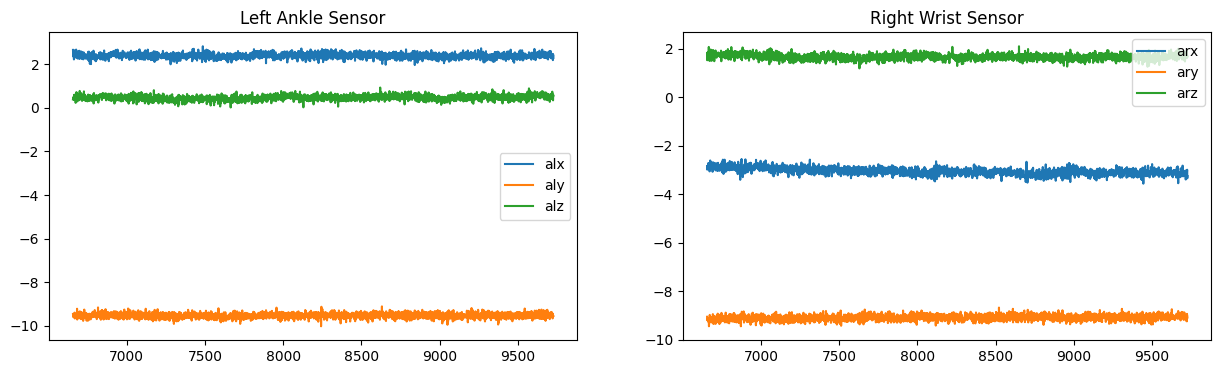

Activity: Standing still - Gyroscope data


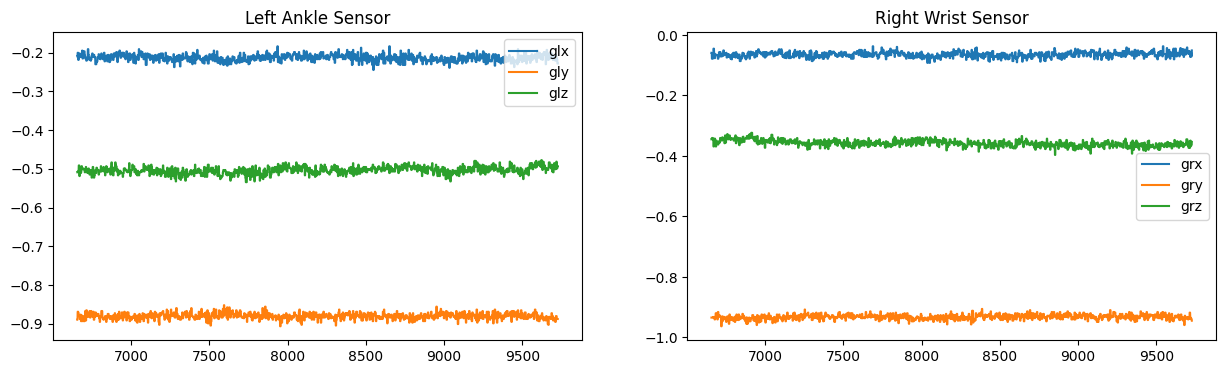

Activity: Sitting and relaxing - Accelerometer data


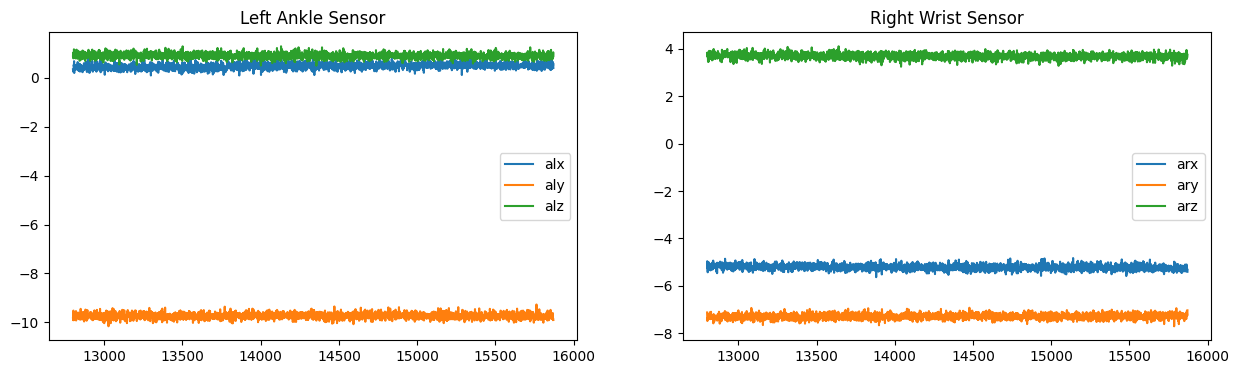

Activity: Sitting and relaxing - Gyroscope data


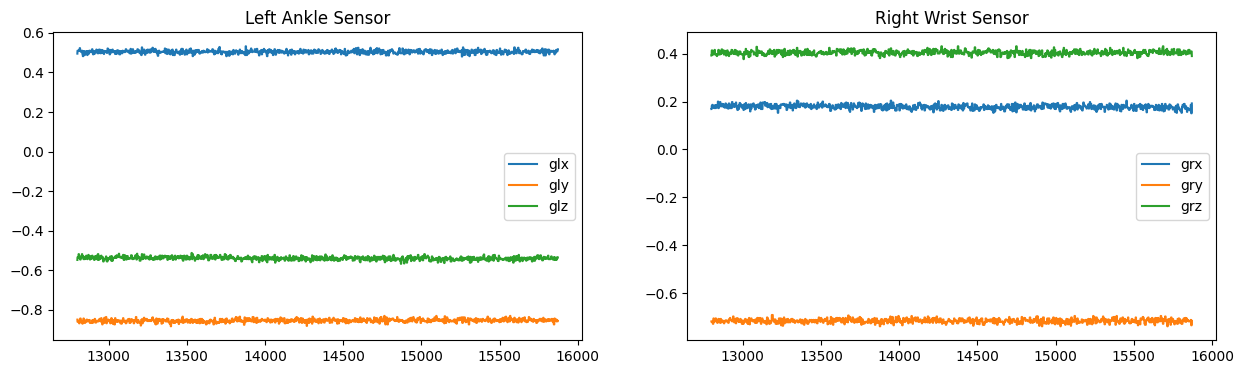

Activity: Lying down - Accelerometer data


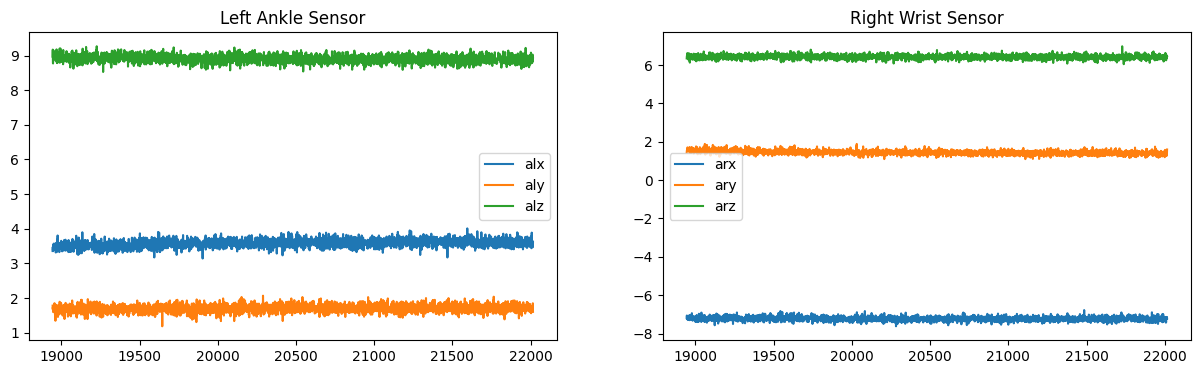

Activity: Lying down - Gyroscope data


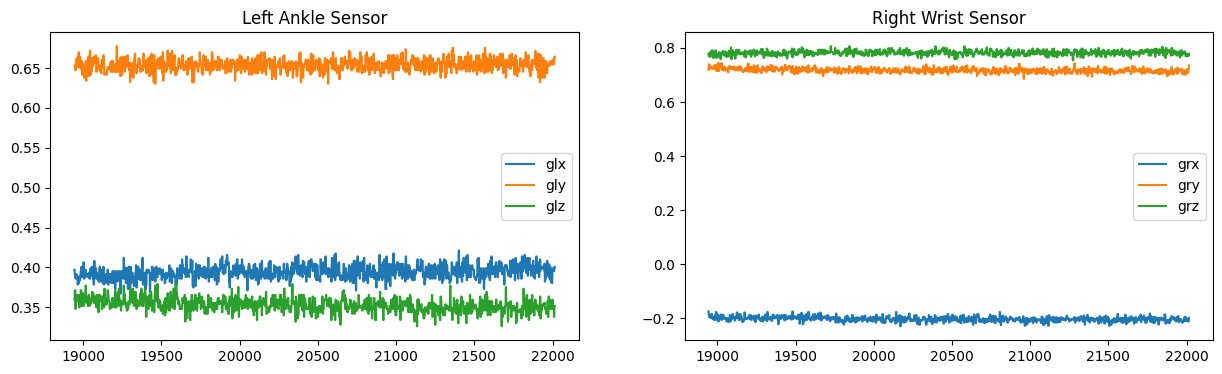

Activity: Walking - Accelerometer data


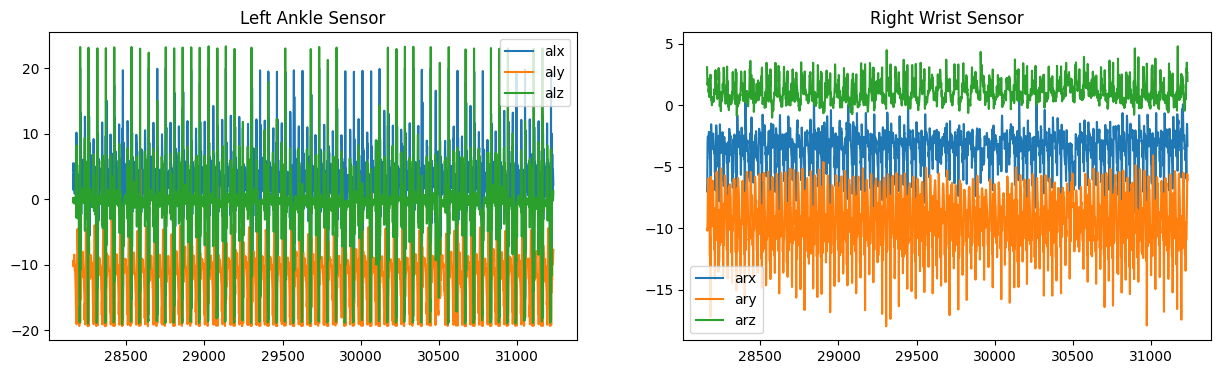

Activity: Walking - Gyroscope data


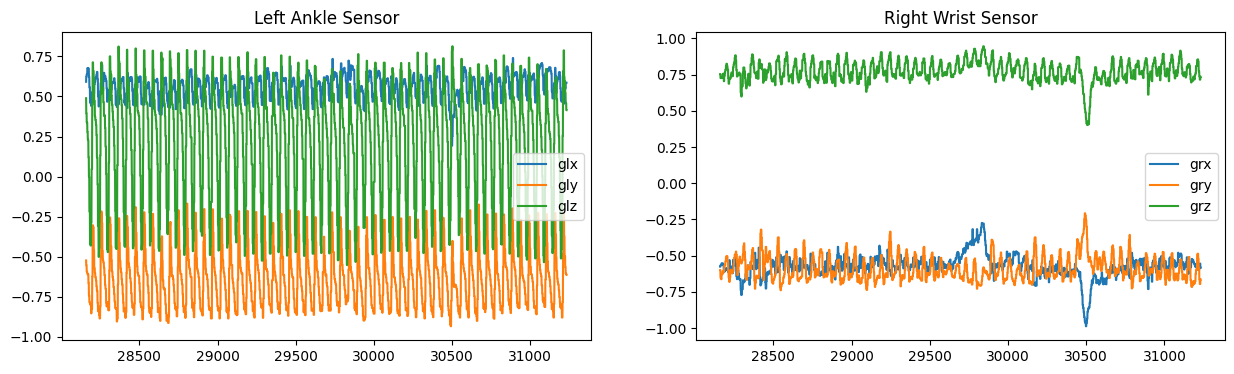

Activity: Climbing stairs - Accelerometer data


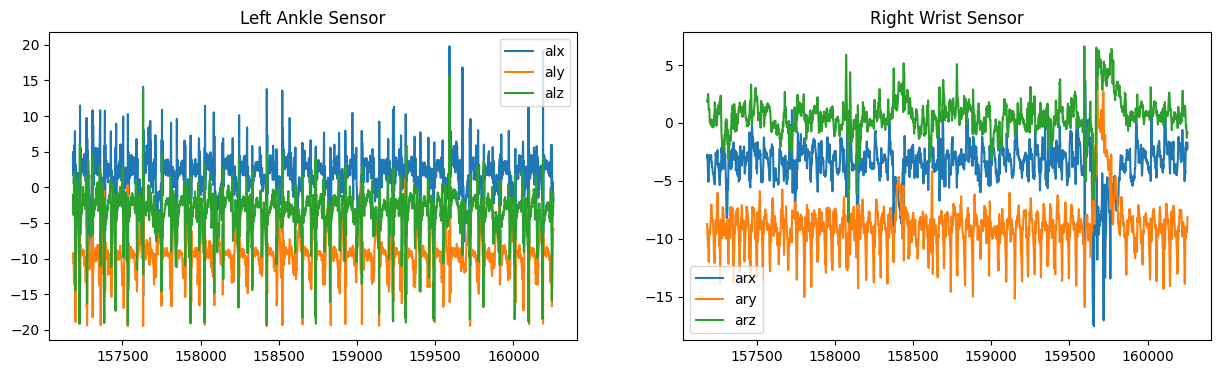

Activity: Climbing stairs - Gyroscope data


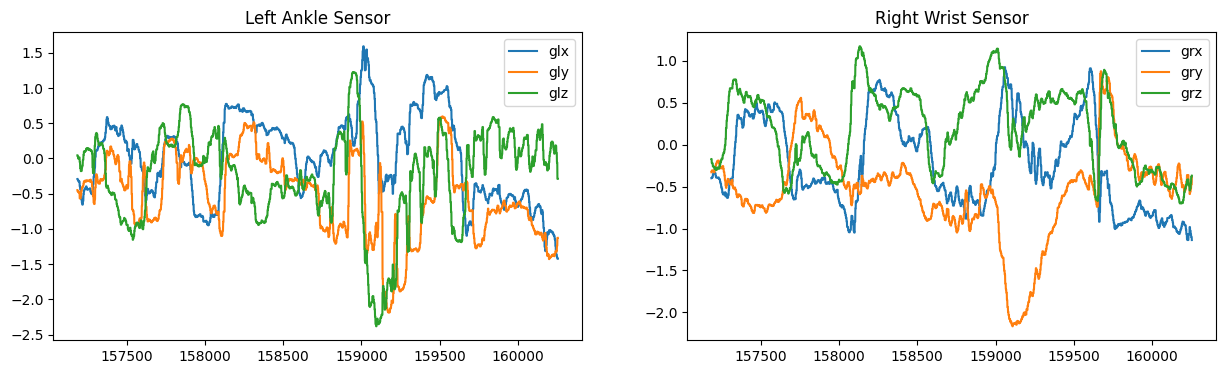

Activity: Waist bends forward - Accelerometer data


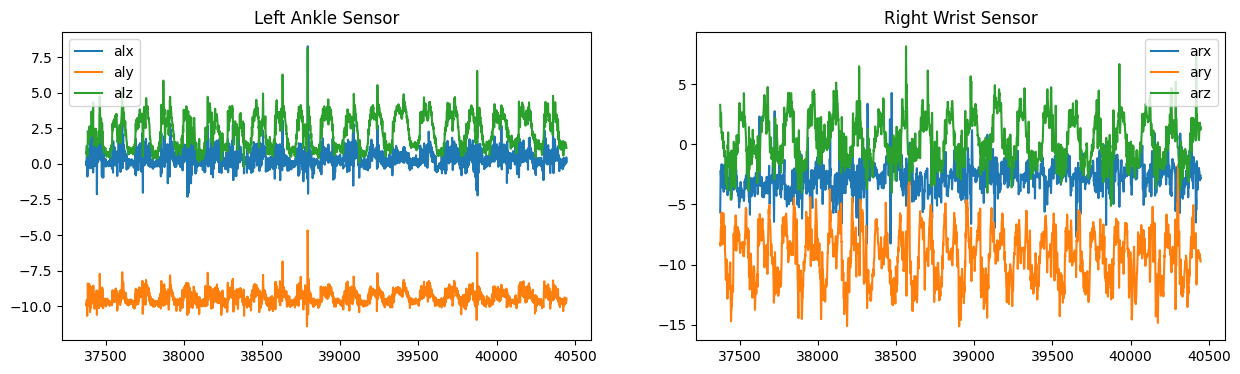

Activity: Waist bends forward - Gyroscope data


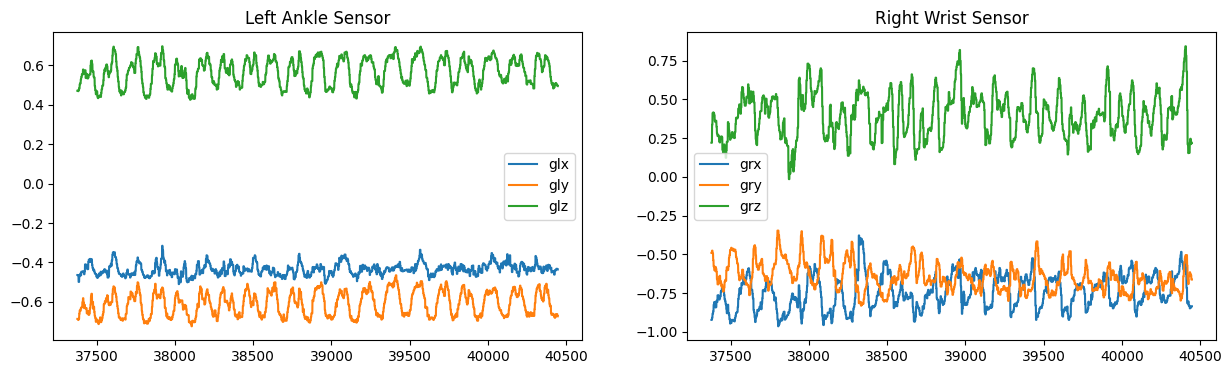

Activity: Frontal elevation of arms - Accelerometer data


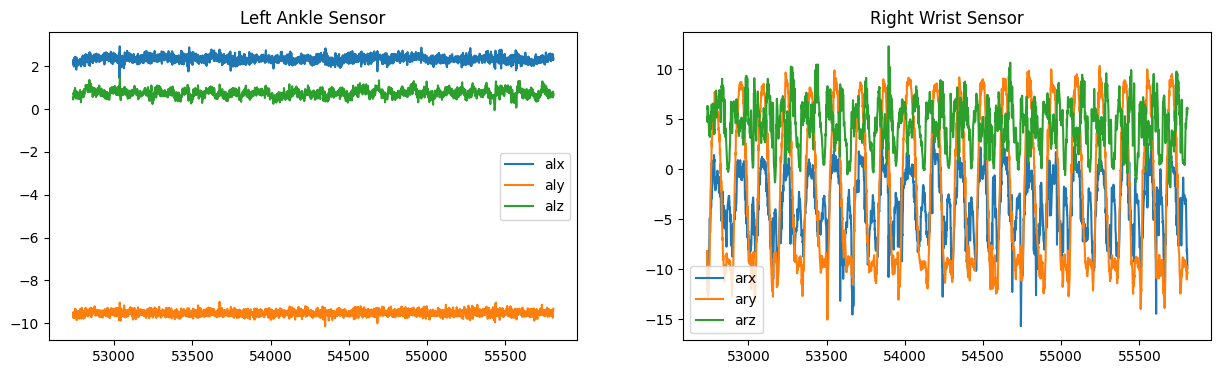

Activity: Frontal elevation of arms - Gyroscope data


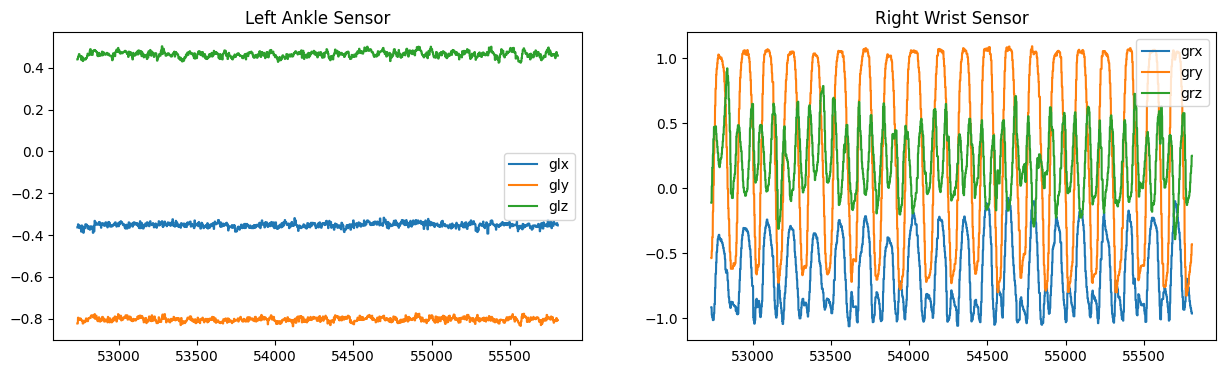

Activity: Knees bending (crouching) - Accelerometer data


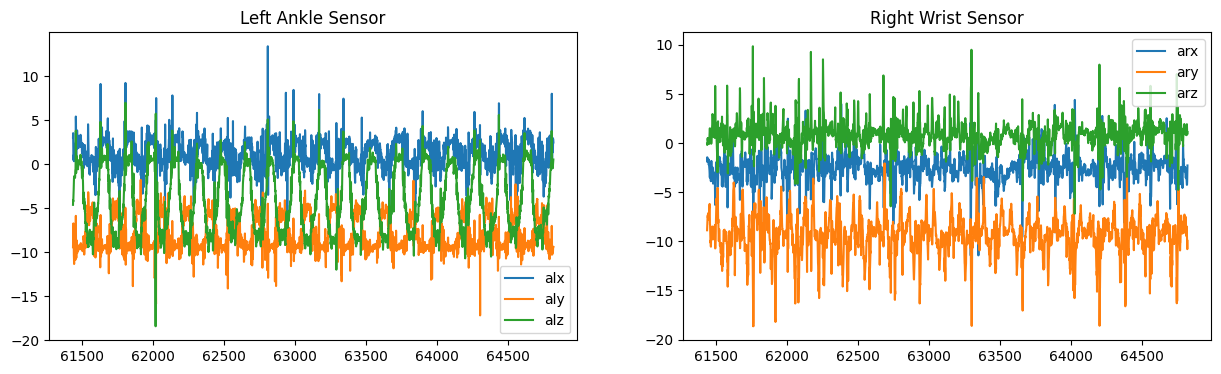

Activity: Knees bending (crouching) - Gyroscope data


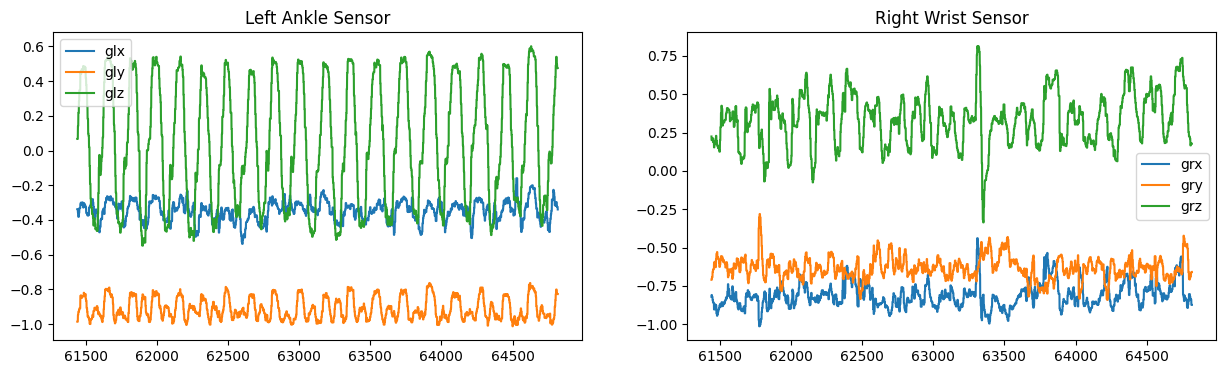

Activity: Cycling - Accelerometer data


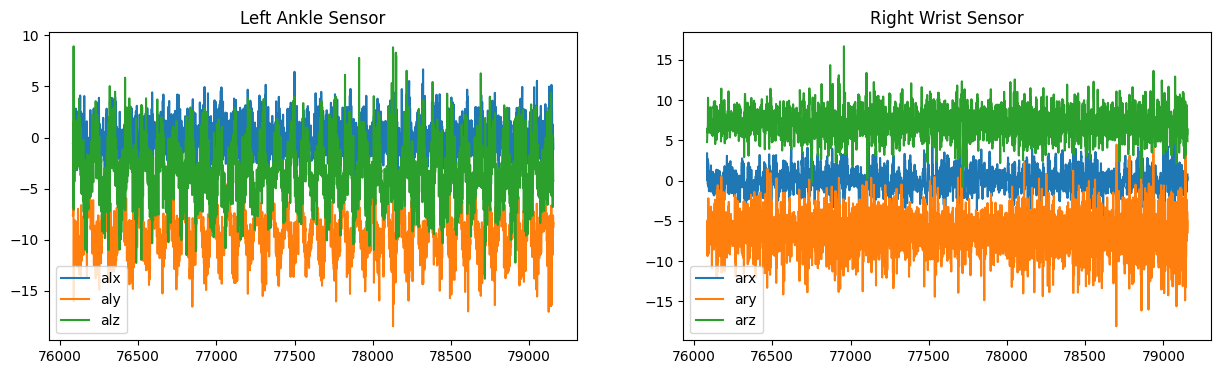

Activity: Cycling - Gyroscope data


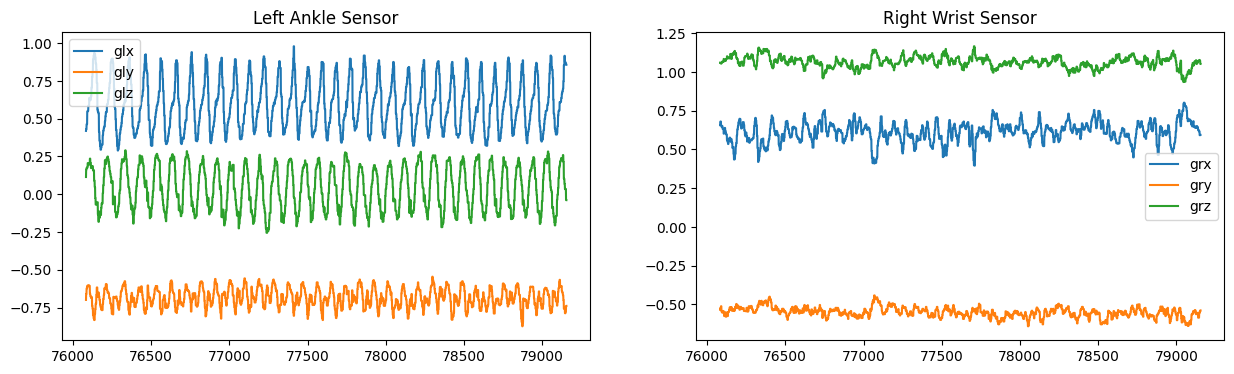

Activity: Jogging - Accelerometer data


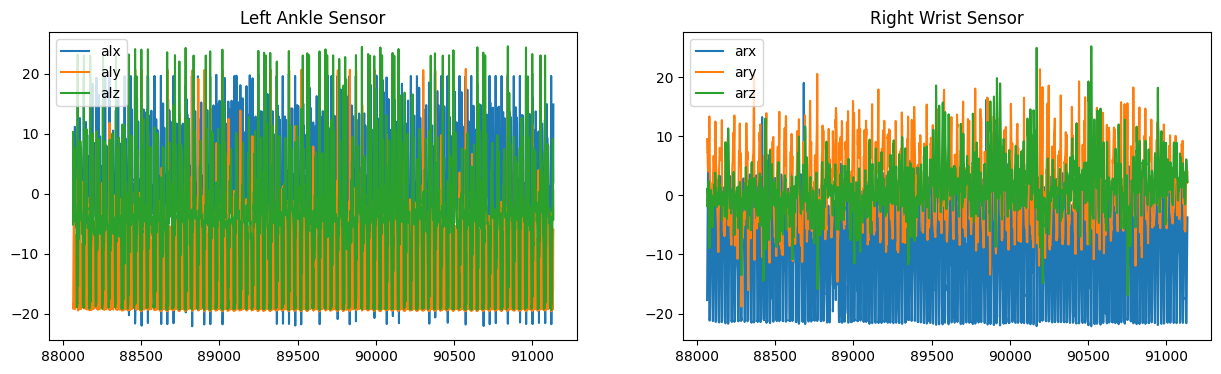

Activity: Jogging - Gyroscope data


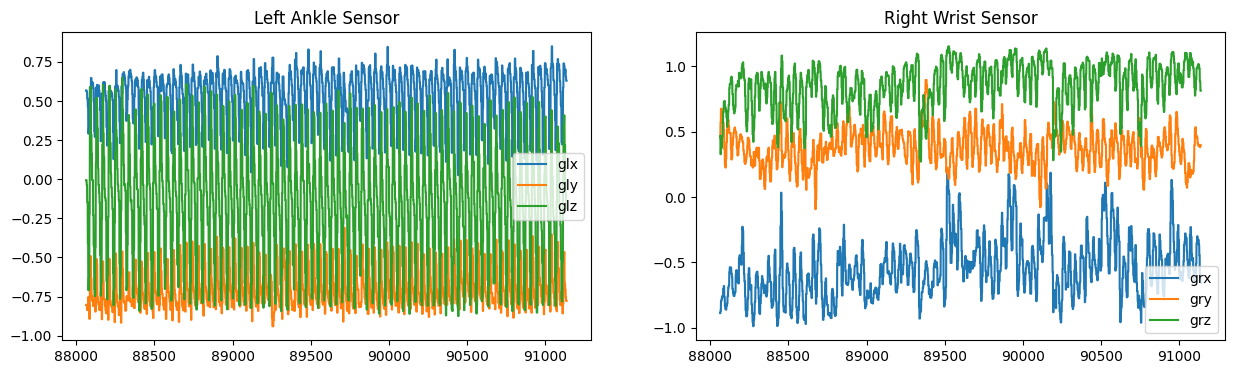

Activity: Running - Accelerometer data


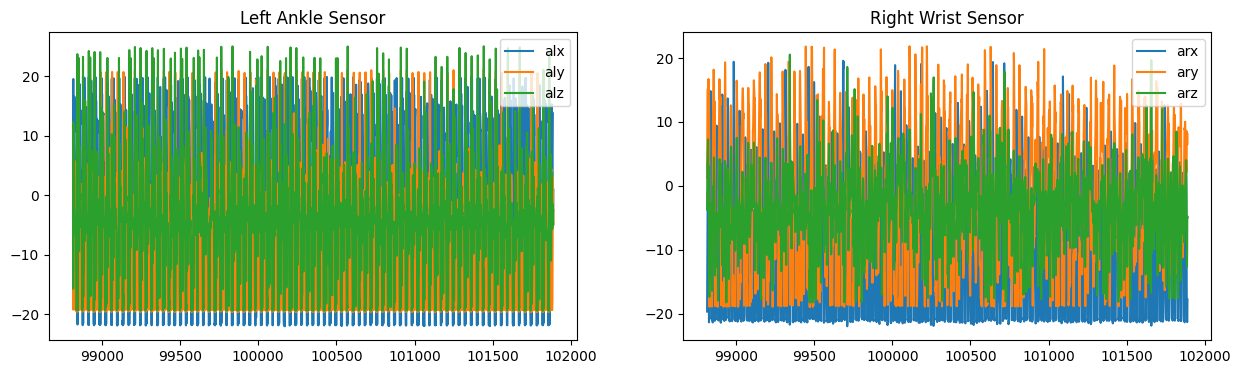

Activity: Running - Gyroscope data


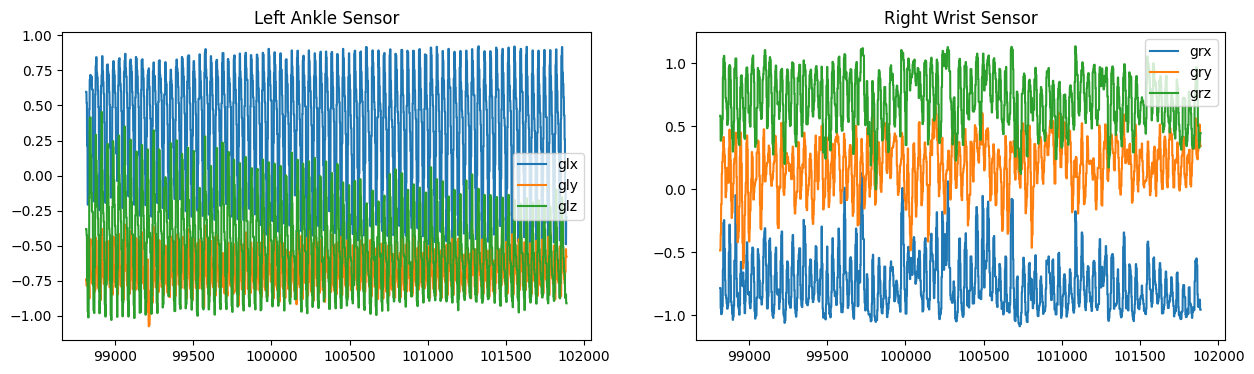

Activity: Jump front & back - Accelerometer data


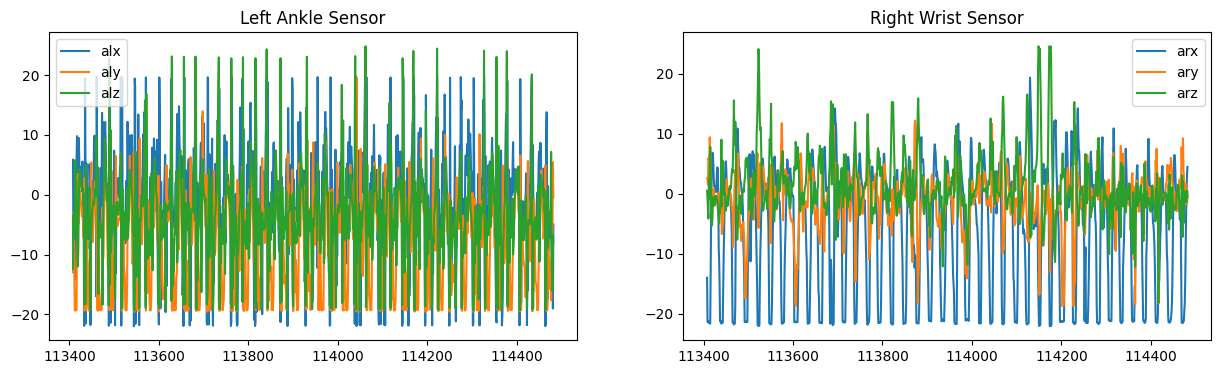

Activity: Jump front & back - Gyroscope data


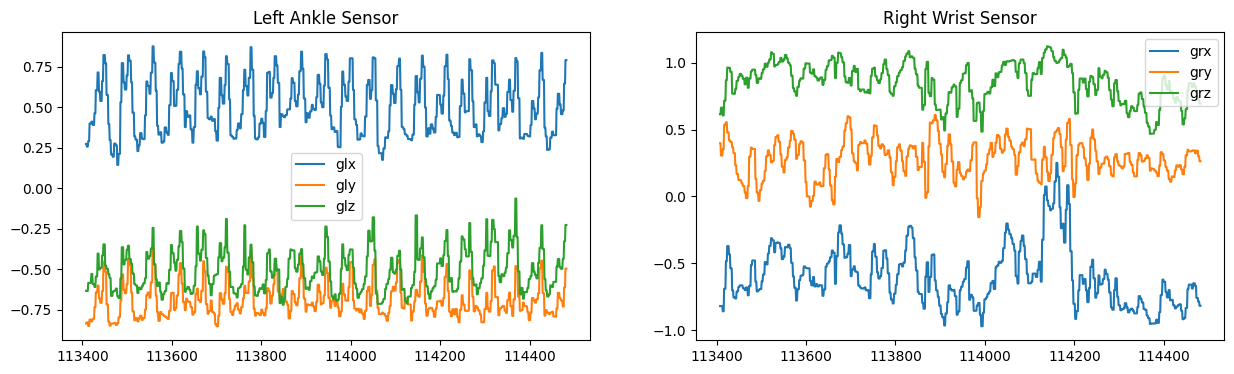

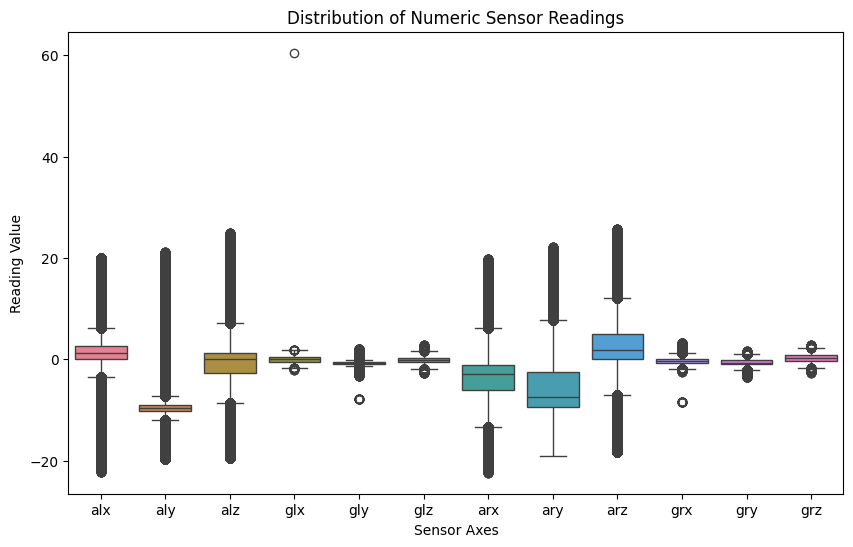


Number of samples per activity class:
Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
5      30720
11     30720
10     30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


/tmp/ipython-input-3353738030.py:121: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = data.groupby('Activity').apply(



Head of the balanced and sampled data:
            alx      aly      alz      glx       gly      glz       arx  \
124078 -0.57510  20.8330  3.11920  0.10019 -0.054409 -1.15720 -21.29100   
11461  -0.38652  -9.7564  1.59170 -0.43599 -0.637900  0.62279  -2.32250   
113116 -1.52070 -13.4670  1.81140 -0.09833 -0.347090 -1.02160  -4.33920   
14005   2.09320  -9.5565  0.78269  0.75325 -0.634150 -0.13163  -2.40120   
83589  -5.50540  -8.1953 -5.67320  0.18924 -0.450280 -0.99018  -0.81029   

            ary       arz      grx      gry       grz  Activity  
124078   4.7612 -1.876500 -0.65098  0.71253  0.642240        11  
11461   -9.5407  0.929210 -0.83922 -0.67967  0.157330         1  
113116   6.6941  1.407600 -0.40000 -1.01440 -0.040948        10  
14005   -9.5976  0.238870  0.43922 -0.99795  0.418100         1  
83589  -10.9800  0.003085  0.61961 -0.98563  0.058190         8  

Shape of the target variable (y): (134446,)

Training features shape: (107556, 12)
Training target shape: (10755

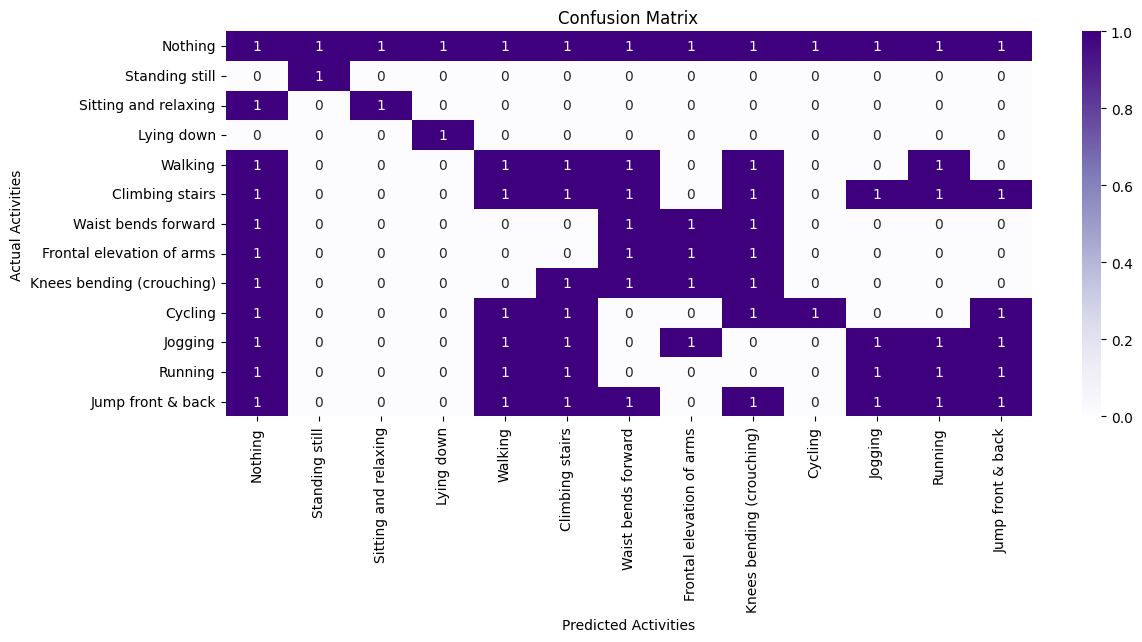

--- Model Performance Metrics ---
Accuracy: 92.87 %
Precision: 92.74 %
Recall: 92.80 %
F1_Score: 92.47 %


--- Evaluating Support Vector Machine Classifier ---


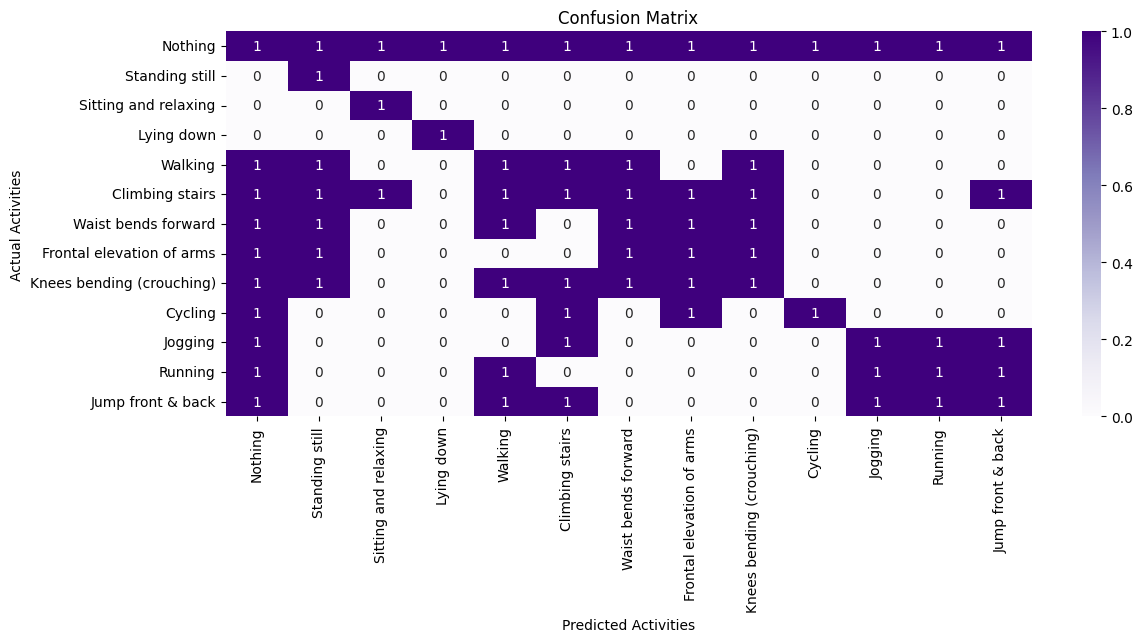

--- Model Performance Metrics ---
Accuracy: 92.78 %
Precision: 92.52 %
Recall: 92.72 %
F1_Score: 92.30 %


--- Evaluating Logistic Regression Classifier ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


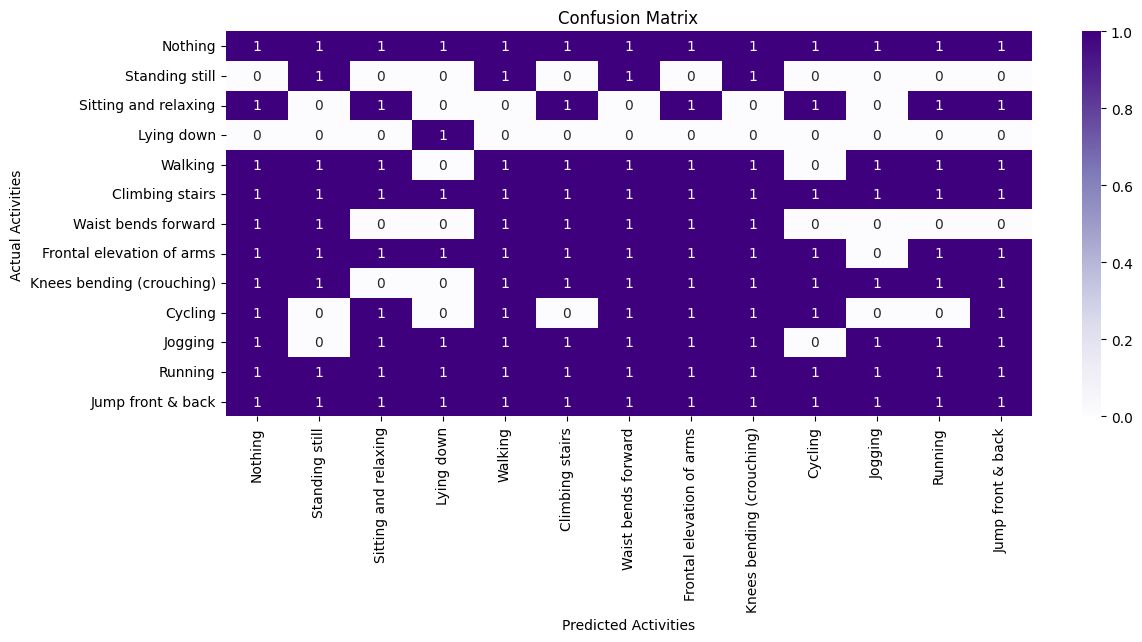

--- Model Performance Metrics ---
Accuracy: 55.79 %
Precision: 53.51 %
Recall: 55.68 %
F1_Score: 53.90 %


In [ ]:
# This script performs a comprehensive analysis of the MHEALTH dataset,
# including data loading, preprocessing, visualization, and training
# several machine learning models for activity recognition.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --- Data Loading and Initial Exploration ---

# Load the dataset from the zipped CSV file.
try:
    data = pd.read_csv("/content/mhealth_raw_data.csv.zip")
except FileNotFoundError:
    print("Error: The file 'mhealth_raw_data.csv.zip' was not found. Please ensure it's in the correct directory.")
    exit()

print("Initial data head:")
print(data.head())
print("\nData shape:")
print(data.shape)
print("\nMissing values per column:")
print(data.isna().sum())
print("\nDataFrame information:")
data.info()

# Select a subset of numeric columns for analysis.
numeric_fields = ["alx", "aly", "alz", "glx", "gly", "glz", "arx", "ary", "arz", "grx", "gry", "grz"]
numeric_data = data[numeric_fields]

print("\nSummary statistics for numeric columns:")
print(numeric_data.describe())
print(f"\nNumber of dplicate rows found: {data.duplicated().sum()}")


# --- Activity Mapping and Visualization ---

# Create a mapping dictionary for activity IDs to descriptive labels.
activity_mapping = {
    0: 'Nothing', 1: 'Standing still', 2: 'Sitting and relaxing', 3: 'Lying down',
    4: 'Walking', 5: 'Climbing stairs', 6: 'Waist bends forward', 7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)', 9: 'Cycling', 10: 'Jogging', 11: 'Running',
    12: 'Jump front & back'
}

# Select data for a single subject for plotting.
subject_one_data = data[data["subject"] == "subject1"]
sensor_types = ['a', 'g']

# Plot the sensor data for subject 1 for each activity.
for activity_id in range(1, 13):
    for sensor_type in sensor_types:
        print(f"Activity: {activity_mapping[activity_id]} - {'Accelerometer' if sensor_type == 'a' else 'Gyroscope'} data")

        current_activity_data = subject_one_data[subject_one_data['Activity'] == activity_id]

        plt.figure(figsize=(15, 4))

        # Plot left ankle sensor data
        plt.subplot(1, 2, 1)
        plt.plot(current_activity_data[sensor_type + 'lx'], label=sensor_type + 'lx')
        plt.plot(current_activity_data[sensor_type + 'ly'], label=sensor_type + 'ly')
        plt.plot(current_activity_data[sensor_type + 'lz'], label=sensor_type + 'lz')
        plt.title("Left Ankle Sensor")
        plt.legend()

        # Plot right wrist sensor data
        plt.subplot(1, 2, 2)
        plt.plot(current_activity_data[sensor_type + 'rx'], label=sensor_type + 'rx')
        plt.plot(current_activity_data[sensor_type + 'ry'], label=sensor_type + 'ry')
        plt.plot(current_activity_data[sensor_type + 'rz'], label=sensor_type + 'rz')
        plt.title("Right Wrist Sensor")
        plt.legend()

        plt.show()

# Visualize data distribution using a box plot.
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title("Distribution of Numeric Sensor Readings")
plt.xlabel("Sensor Axes")
plt.ylabel("Reading Value")
plt.show()

# --- Data Preprocessing: Balancing and Scaling ---

# Count the number of samples for each activity class.
class_counts = data["Activity"].value_counts()
print("\nNumber of samples per activity class:")
print(class_counts)

# Define a function to balance the dataset by downsampling each class
# to the size of the smallest class.
def balance_data_by_sampling(target_size):
    """
    Balances the dataset by downsampling all classes to the size of the
    smallest class, and then samples a total size based on the target.

    Args:
        target_size (int): The number of rows to sample from each class
                           before combining.

    Returns:
        pd.DataFrame: The balanced and sampled DataFrame.
    """
    activity_counts = data['Activity'].value_counts()
    min_count = activity_counts.min()
    balanced_df = data.groupby('Activity').apply(
        lambda x: x.sample(min_count, random_state=42)
    ).reset_index(drop=True)
    return balanced_df.sample(target_size * len(activity_counts), random_state=42)

# Sample the data to create a balanced subset for training.
columns_for_training = numeric_fields + ["Activity"]
sampled_data = balance_data_by_sampling(10342)  
sampled_data = sampled_data[columns_for_training]

print("\nHead of the balanced and sampled data:")
print(sampled_data.head())

# Define features (X) and target (y).
X_features = sampled_data.iloc[:, :-1] #all data except activity
y_target = sampled_data.iloc[:, -1] #activity data
print(f"\nShape of the target variable (y): {y_target.shape}")

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42, shuffle=True
)

# Convert to NumPy arrays and reshape the target for model compatibility.
X_train = np.asarray(X_train)
y_train = np.asarray(y_train).reshape(-1, 1)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test).reshape(-1, 1)

print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print("\nExample of training target data:")
print(y_train)

# Scale the data using RobustScaler, which is suitable for outliers.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Evaluation Function ---

def evaluate_model_performance(true_labels, predicted_labels):
    """
    Calculates and displays performance metrics and a confusion matrix
    for a given set of predictions.

    Args:
        true_labels (array): The ground truth labels.
        predicted_labels (array): The predicted labels from a model.
    """
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    # Convert confusion matrix to a binary heatmap for visualization
    binary_conf_matrix = np.where(conf_matrix > 1, 1, 0)

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(13, 5))
    sns.heatmap(binary_conf_matrix, cmap="Purples", annot=True,
                xticklabels=list(activity_mapping.values()),
                yticklabels=list(activity_mapping.values()))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Activities")
    plt.ylabel("Actual Activities")
    plt.show()

    # Calculate and print performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average="macro")
    recall = recall_score(true_labels, predicted_labels, average="macro")
    f1 = f1_score(true_labels, predicted_labels, average="macro")

    print("--- Model Performance Metrics ---")
    print(f"Accuracy: {accuracy * 100:.2f} %")
    print(f"Precision: {precision * 100:.2f} %")
    print(f"Recall: {recall * 100:.2f} %")
    print(f"F1_Score: {f1 * 100:.2f} %")


# --- Model Training and Prediction ---

# 1. K-Nearest Neighbors (KNN) Classifier
print("\n\n--- Evaluating K-Nearest Neighbors Classifier ---")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, np.ravel(y_train))
knn_predictions = knn_model.predict(X_test_scaled)
evaluate_model_performance(y_test, knn_predictions)

# 2. Support Vector Machine (SVC) Classifier
print("\n\n--- Evaluating Support Vector Machine Classifier ---")
svm_model = SVC(kernel="rbf", C=10)
svm_model.fit(X_train_scaled, np.ravel(y_train))
svm_predictions = svm_model.predict(X_test_scaled)
evaluate_model_performance(y_test, svm_predictions)

# 3. Logistic Regression Classifier
print("\n\n--- Evaluating Logistic Regression Classifier ---")
lr_model = LogisticRegression(C=6, max_iter=1000)
# Note: Using unscaled data for Logistic Regression to show a different approach,
# although scaling is generally recommended.
lr_model.fit(X_train, np.ravel(y_train))
lr_predictions = lr_model.predict(X_test)
evaluate_model_performance(y_test, lr_predictions)


In [ ]:
import numpy as np

# These are the 12 values you provided:
# [alx, aly, alz, glx, gly, glz, arx, ary, arz, grx, gry, grz]
new_data_sample = [
    0.48067, -9.7728, 0.94248, 0.40794, -0.85366, -0.53945, 
    -5.0734, -7.0919, 3.8121, 0.18235, -0.71869, 0.2844
]

# Reshape the data (1 sample, 12 features)
new_data = np.array([new_data_sample]) 

print(f"Shape of new data: {new_data.shape}")

# Use the 'scaler' object trained in the notebook
# This ensures the data is correctly scaled before prediction.
new_data_scaled = scaler.transform(new_data)

# Use the svm_model to predict
new_prediction = svm_model.predict(new_data_scaled)
predicted_activity_number = new_prediction[0]

print(f"--- New Prediction ---")
print(f"The new sensor data was: {new_data_sample}")
print(f"The model predicts the activity is: {predicted_activity_number}")

# Look up the activity name from the mapping
print(f"Predicted Activity Name: {activity_mapping[predicted_activity_number]}")